In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [54]:
trn = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
tst = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
y_tst = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')['SalePrice']

In [4]:
trn.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
def preprocess(df):
    for el in df.columns:
        l = []
        for ind in df[el].value_counts().index:
            if type(ind) == str:
                l.append(ind)
        if len(l) > 0:
            for i in range(len(l)):
                df = df.replace(l[i], i)
    df = df.replace(np.NaN, 0)
    return df

In [7]:
train = preprocess(trn.copy())
test = preprocess(tst.copy())

In [53]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,4.0,80.0,11622,0,0.0,0,0,0.0,...,120,0,0.0,0.0,0.0,0,6,2010,0.0,0
1,1462,20,0.0,81.0,14267,0,0.0,1,0,0.0,...,0,0,0.0,0.0,0.0,12500,6,2010,0.0,0
2,1463,60,0.0,74.0,13830,0,0.0,1,0,0.0,...,0,0,0.0,0.0,0.0,0,3,2010,0.0,0
3,1464,60,0.0,78.0,9978,0,0.0,1,0,0.0,...,0,0,0.0,0.0,0.0,0,6,2010,0.0,0
4,1465,120,0.0,43.0,5005,0,0.0,1,1,0.0,...,144,0,0.0,0.0,0.0,0,1,2010,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0,6,2006,0.0,0
1455,2916,160,1.0,21.0,1894,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0,4,2006,0.0,2
1456,2917,20,0.0,160.0,20000,0,0.0,0,0,0.0,...,0,0,0.0,0.0,0.0,0,9,2006,0.0,2
1457,2918,85,0.0,62.0,10441,0,0.0,0,0,0.0,...,0,0,0.0,0.0,5.0,700,7,2006,0.0,0


In [32]:
X = train.iloc[:, 0:-1]
y = train.iloc[:, -1]

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Стандартизация
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
tst = scaler.fit_transform(test)

# Построение модели

## 1) Decision Tree Regression


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, random_state=0, splitter='best')

In [24]:
y_pred = regressor.predict(x_val)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print("R2-score: {:.2f}%".format(r2 * 100))
print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))

R2-score: 79.54%
MAE: 27525.67
MSE: 1569393634.11


## 2) Pycaret

In [ ]:
!pip install pycaret

In [ ]:
pip install --user scikit-learn

In [12]:
from sklearn.metrics._scorer import _SCORERS

In [17]:
from pycaret.regression import *
s = setup(train, target = 'SalePrice', session_id = 1)

,Description,Value
0,Session id,1
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 81)"
5,Transformed train set shape,"(1021, 81)"
6,Transformed test set shape,"(439, 81)"
7,Numeric features,80
8,Preprocess,True
9,Imputation type,simple


In [18]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15332.9001,773798562.1442,26900.0151,0.8761,0.1199,0.0841,4.5240
gbr,Gradient Boosting Regressor,16913.8639,907650788.0096,29208.0083,0.8529,0.1313,0.0936,0.7960
lightgbm,Light Gradient Boosting Machine,17086.6140,894025426.6006,29171.1081,0.8526,0.1318,0.0942,0.2340
xgboost,Extreme Gradient Boosting,18211.1152,961228725.9526,30177.8666,0.8447,0.1368,0.0995,0.6170
et,Extra Trees Regressor,17919.2208,1007514966.6262,30790.7641,0.8377,0.1425,0.1015,1.4950
rf,Random Forest Regressor,18323.0580,1062202651.5057,31705.8721,0.8267,0.1458,0.1039,2.1880
ada,AdaBoost Regressor,24837.9133,1461342354.2156,37428.1067,0.7568,0.1979,0.1585,0.4310
br,Bayesian Ridge,21156.2526,1551004904.5067,37289.3162,0.7291,0.1812,0.1198,0.0330
ridge,Ridge Regression,22371.1517,1591535274.6716,37927.1276,0.7240,0.2001,0.1295,0.0290
en,Elastic Net,20625.2778,1608412697.8865,37942.2802,0.7177,0.1861,0.1150,0.0600


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
cb = s.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14520.3734,630568360.0245,25111.1202,0.8638,0.1248,0.0887
1,16543.6382,636711186.7499,25233.1367,0.8876,0.1281,0.0937
2,14260.4047,504015586.3142,22450.2915,0.8949,0.1218,0.0842
3,17347.7924,784313294.8272,28005.5940,0.8718,0.1232,0.0901
4,16905.4807,1530936554.0989,39127.1843,0.8211,0.1388,0.0882
5,18021.2336,1624498950.8015,40305.0735,0.7973,0.1262,0.0821
6,15711.8900,723465042.0649,26897.3055,0.8599,0.1128,0.0827
7,14523.6999,472968542.0381,21747.8399,0.9089,0.1118,0.0795
8,11775.3453,271717178.5320,16483.8460,0.9410,0.0896,0.0665


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 3) CatBoost

In [19]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(iterations=50)
cbr.fit(x_train, y_train)

Learning rate set to 0.479262
0:	learn: 57206.4027844	total: 3.95ms	remaining: 194ms
1:	learn: 45517.3312005	total: 7.57ms	remaining: 182ms
2:	learn: 38725.5543996	total: 11.4ms	remaining: 178ms
3:	learn: 33133.0195573	total: 15.6ms	remaining: 180ms
4:	learn: 30812.4751321	total: 18.9ms	remaining: 170ms
5:	learn: 28580.5765996	total: 22.2ms	remaining: 163ms
6:	learn: 27093.9232500	total: 26.3ms	remaining: 162ms
7:	learn: 25788.1990233	total: 30ms	remaining: 158ms
8:	learn: 25358.4608175	total: 33.7ms	remaining: 154ms
9:	learn: 24477.8136759	total: 37ms	remaining: 148ms
10:	learn: 23600.4583505	total: 40.7ms	remaining: 144ms
11:	learn: 23328.5507912	total: 44.4ms	remaining: 140ms
12:	learn: 22334.7171806	total: 47.5ms	remaining: 135ms
13:	learn: 21661.5469653	total: 51.1ms	remaining: 131ms
14:	learn: 21306.0655081	total: 54.3ms	remaining: 127ms
15:	learn: 20458.8992548	total: 57.9ms	remaining: 123ms
16:	learn: 19880.9190437	total: 61.3ms	remaining: 119ms
17:	learn: 19667.0378025	total: 

In [91]:
y_pred = cbr.predict(x_val)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print("R2-score: {:.2f}%".format(r2 * 100))
print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))

R2-score: 85.79%
MAE: 20292.68
MSE: 1089774247.36


## 4) Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rand_reg = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rand_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, monotonic_cst=None,
                      n_estimators=10, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [29]:
y_pred = rand_reg.predict(x_val)
r2_sc = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print("R2-score: {:.2f}%".format(r2_sc * 100))
print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))

R2-score: 87.94%
MAE: 20066.01
MSE: 925210097.62


## 5) Keras-model

In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras import regularizers
r2 = keras.metrics.R2Score()

In [84]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', activity_regularizer=regularizers.L2(1e-5)),
    layers.Dense(128, activation='relu', activity_regularizer=regularizers.L2(1e-5)),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', r2])
mcp_save = ModelCheckpoint('.mdl_wts.keras', save_best_only=True, monitor='val_r2_score', mode='max')

history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=200,
                    callbacks=[mcp_save],
                    validation_data=(x_val, y_val))

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 36736602112.0000 - mae: 177502.0625 - mse: 36736602112.0000 - r2_score: -2.8548 - val_loss: 39650222080.0000 - val_mae: 178830.2656 - val_mse: 39650222080.0000 - val_r2_score: -4.1693
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39867461632.0000 - mae: 182698.2812 - mse: 39867461632.0000 - r2_score: -5.2223 - val_loss: 39632670720.0000 - val_mae: 178794.0469 - val_mse: 39632670720.0000 - val_r2_score: -4.1670
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38212096000.0000 - mae: 179941.9688 - mse: 38212096000.0000 - r2_score: -5.5981 - val_loss: 39569580032.0000 - val_mae: 178673.0625 - val_mse: 39569580032.0000 - val_r2_score: -4.1588
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38297141248.0000 - mae: 180610.9531 - mse: 38297141248.0000 - r2_score: -5.7357 - val_loss: 39414251520.0000 - val_mae: 178379.1250 - val_mse: 39414251520.0000 - val_r2_score: -4.1385
Epoch 5/200
37/37 ━━━━━━━━━

dict_keys(['loss', 'mae', 'mse', 'r2_score', 'val_loss', 'val_mae', 'val_mse', 'val_r2_score'])


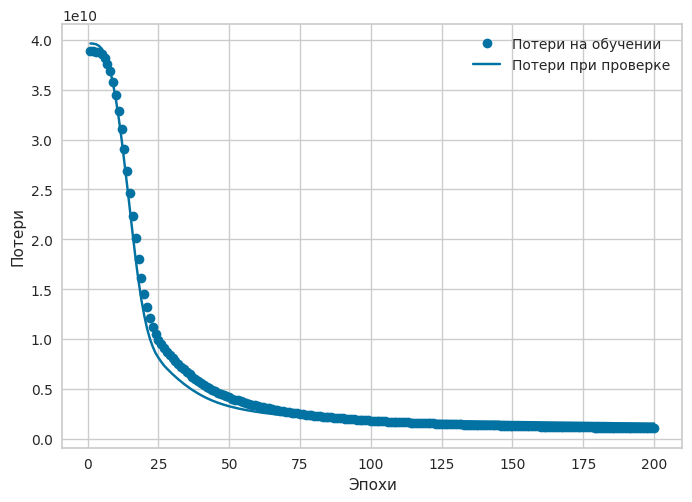

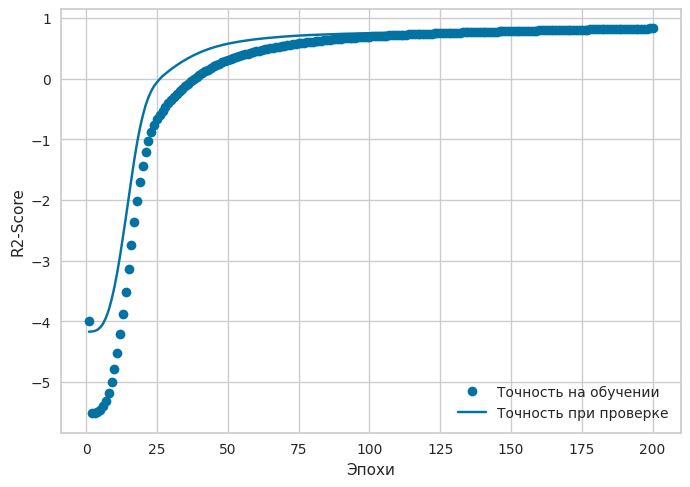

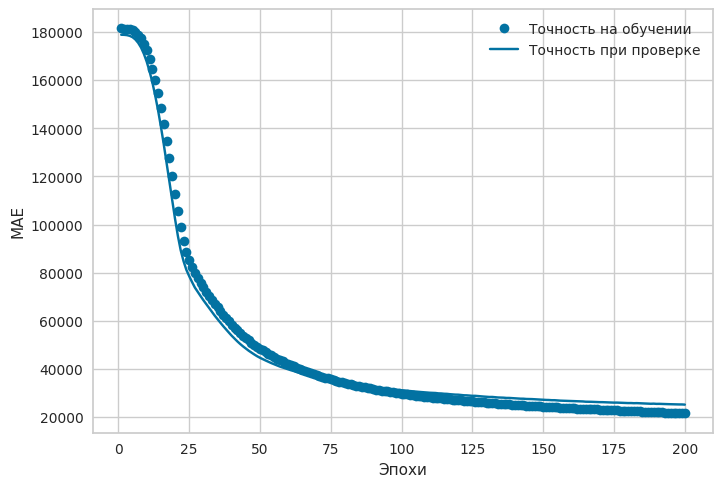

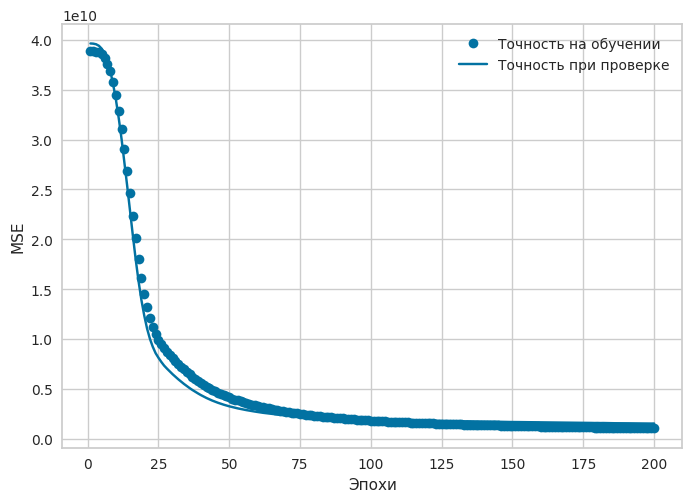

In [92]:
hist_dict = history.history
print(hist_dict.keys())
loss_val = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label='Потери на обучении')
plt.plot(epochs, val_loss_values, 'b', label='Потери при проверке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.figure()
acc = hist_dict['r2_score']
val_acc = hist_dict['val_r2_score']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('R2-Score')
plt.legend()
plt.show()

plt.figure()
acc = hist_dict['mae']
val_acc = hist_dict['val_mae']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.figure()
acc = hist_dict['mse']
val_acc = hist_dict['val_mse']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность при проверке')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()